In [1]:
# On Adrien laptop use CEASELESS Kernel

import xarray as xr
import numpy as np
# from scipy import interpolate
# import matplotlib as mpl
import matplotlib.pyplot as plt
import seastar as ss
# import seastar.oscar
# import seastar.retrieval
from cycler import cycler

# import datetime as dt


In [2]:
azi_step =  5
inci_step = 5

pol   =  np.array([1, 2])
wspd  =  np.array([3, 5, 7, 10, 15, 20, 30])
theta =  np.arange(15, 60, inci_step)
azi   =  np.arange(0, 181, azi_step)

[wspd_mat, theta_mat, azi_mat, pol_mat] =  np.meshgrid(wspd, theta, azi, pol, indexing='ij')

In [3]:
s0_lin = ss.gmfs.nrcs.nscat4(
    wspd_mat,
    azi_mat,
    theta_mat,
    pol_mat,
)

In [4]:
ds = xr.Dataset(
    data_vars=dict(
        sigma0_lin=(['wspd','inci','azi','pol'], s0_lin)
    ),
    coords=dict(
        wspd=wspd,
        inci=theta,
        azi=azi,
        pol=pol
    )
)

In [5]:
ds['sigma0_dB'] = 10 * np.log10(ds.sigma0_lin)

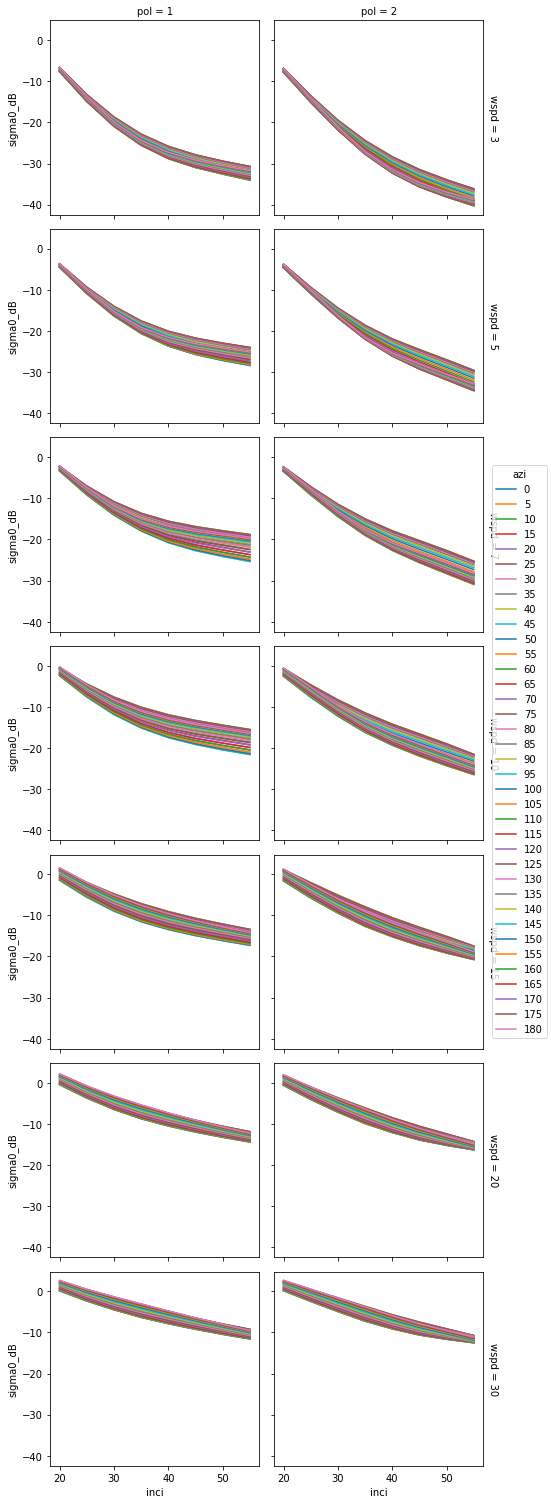

In [6]:
# fig = plt.figure()
# ax = plt.gca()
# colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, ds.azi.size)]
# ax.set_prop_cycle('color', colors)
# import seaborn as sns
# sns.color_palette('viridis', as_cmap=True)
ds.sigma0_dB.plot(
    x='inci', hue='azi', col='pol', row='wspd',
#     hue_kws={'color':colors}
)

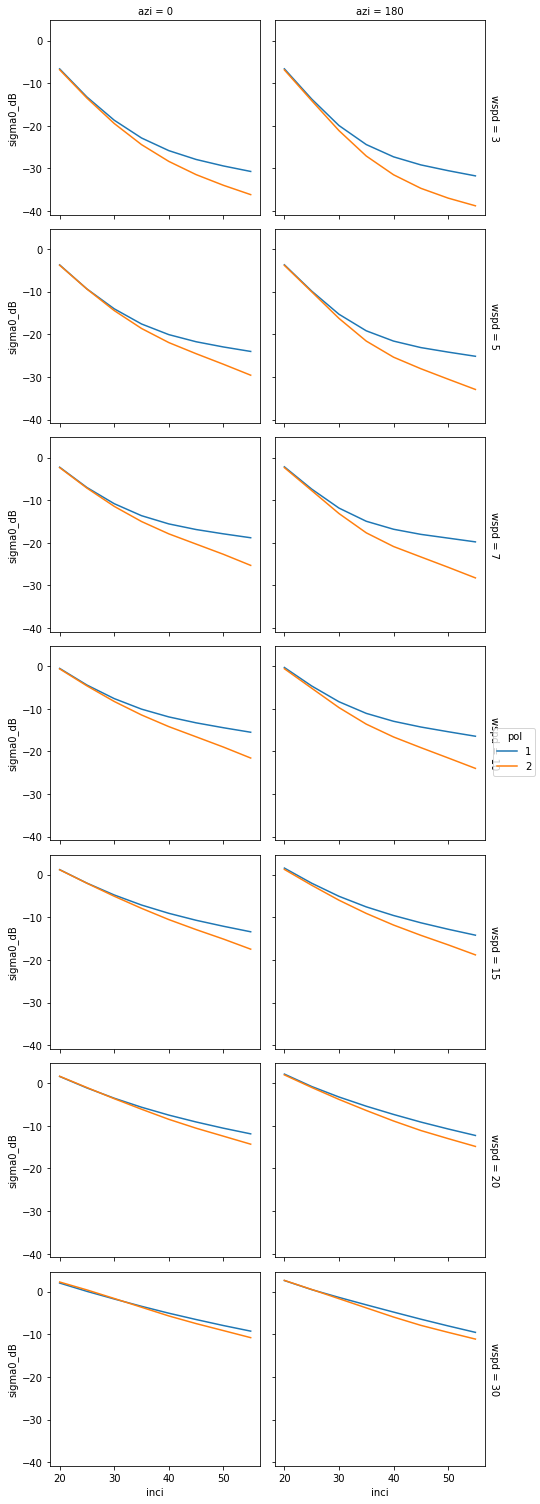

In [7]:
ds.sigma0_dB.sel(azi=[0,180]).plot(
    x='inci', hue='pol', col='azi', row='wspd',
)

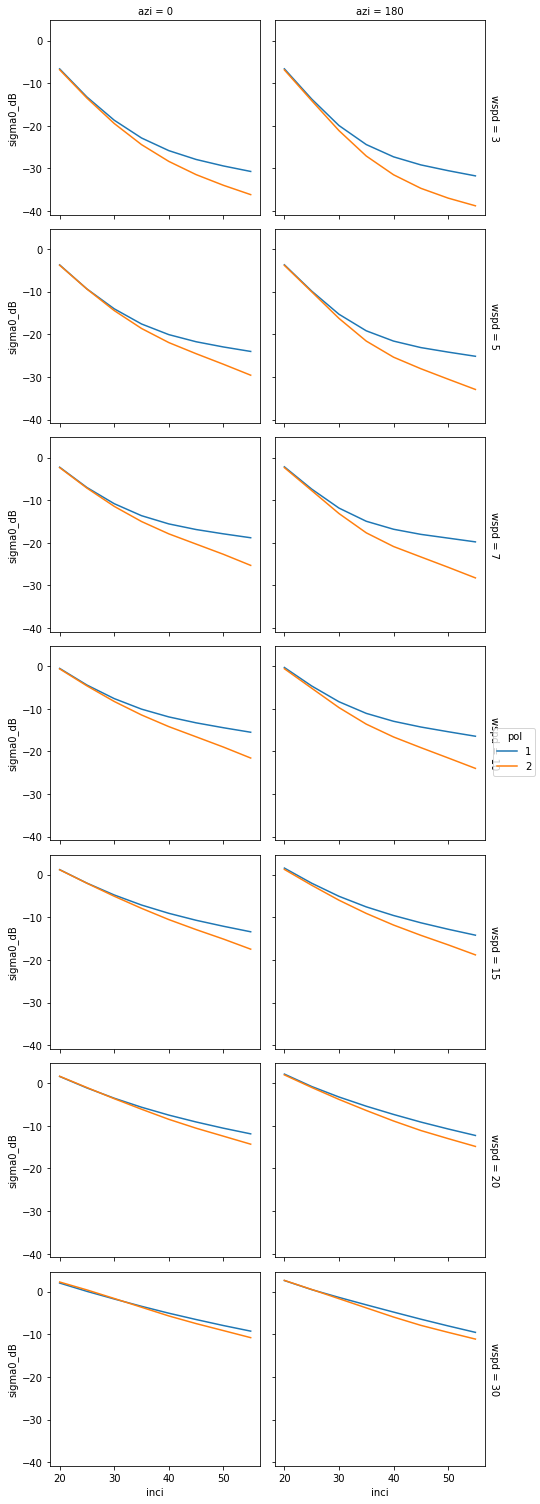

In [8]:
ds.sigma0_dB.sel(azi=[0,180]).plot(
    x='inci', hue='pol', col='azi', row='wspd',
)

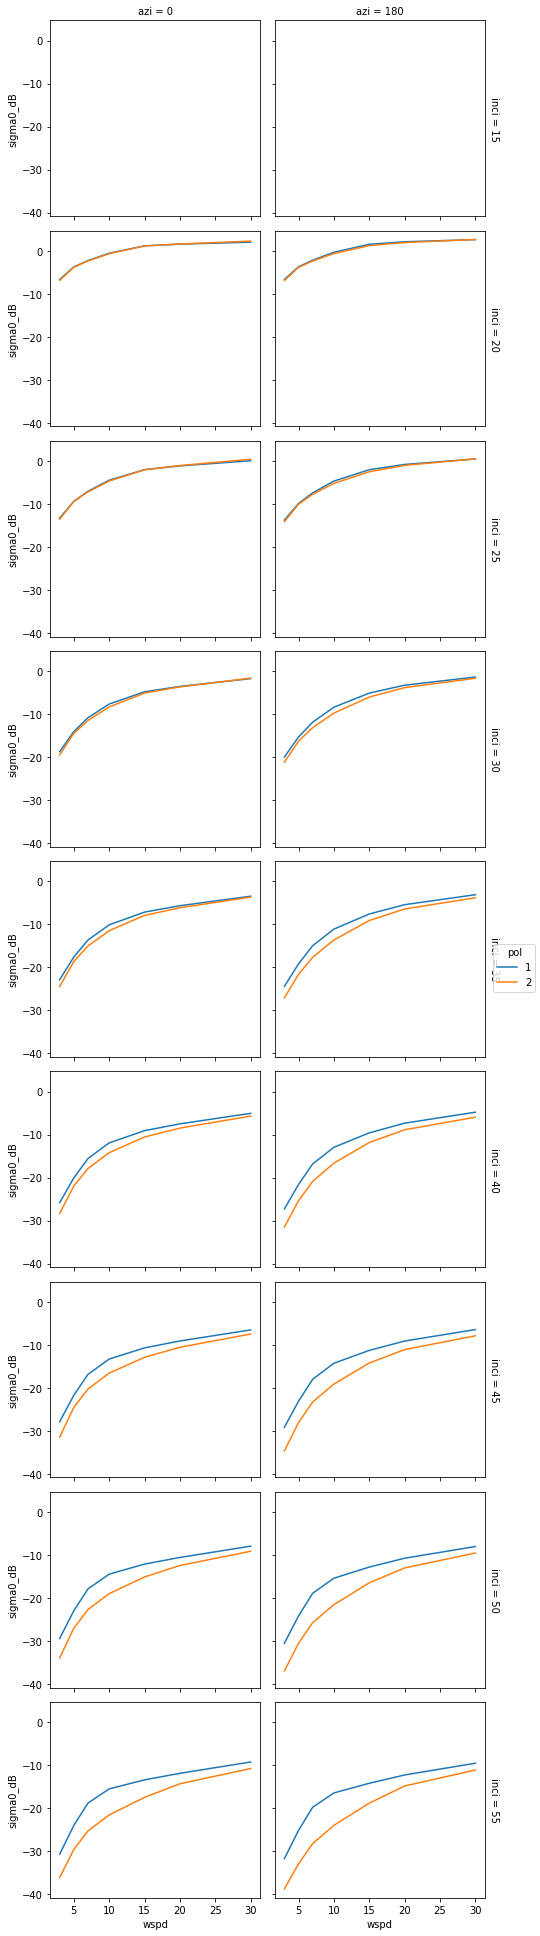

In [9]:
ds.sigma0_dB.sel(azi=[0,180]).plot(
    x='wspd', hue='pol', col='azi', row='inci',
)

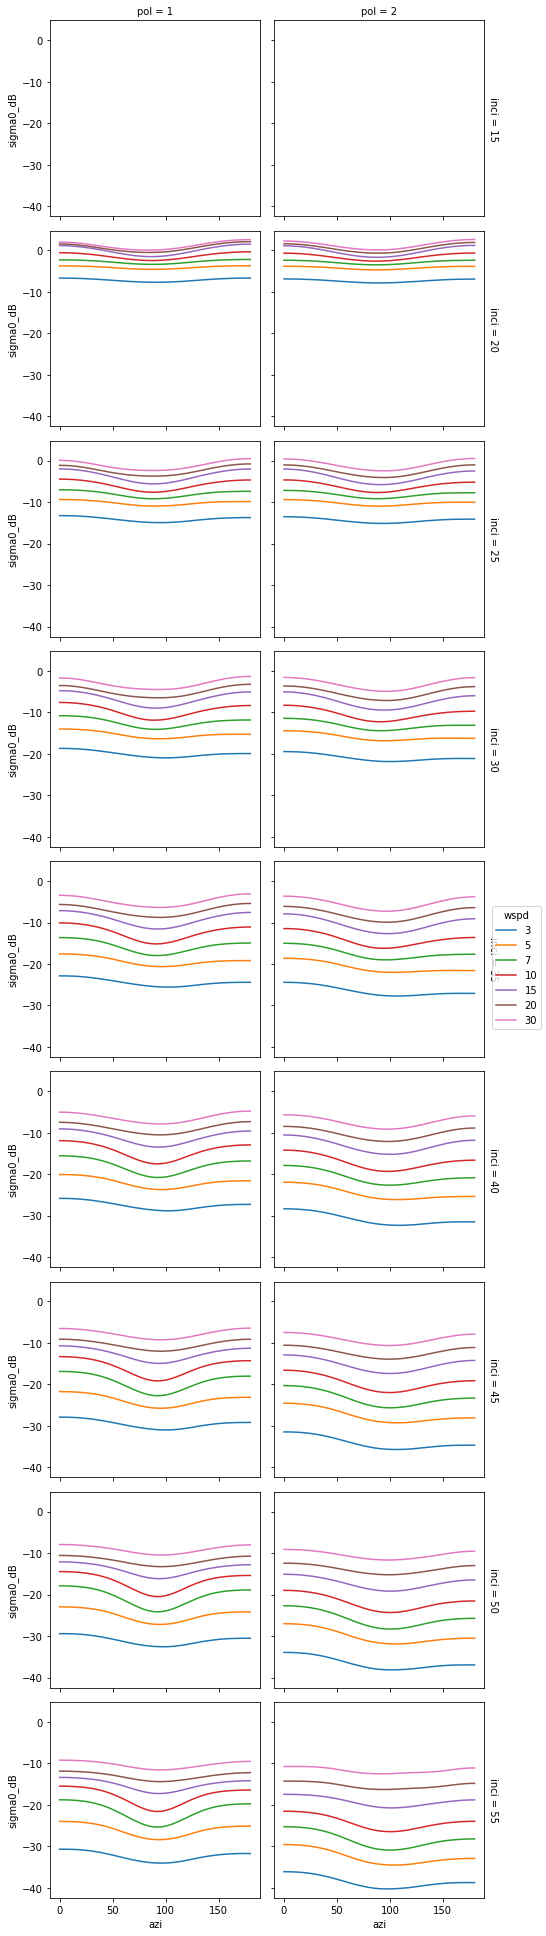

In [10]:
ds.sigma0_dB.plot(
    x='azi', hue='wspd', col='pol', row='inci',
)

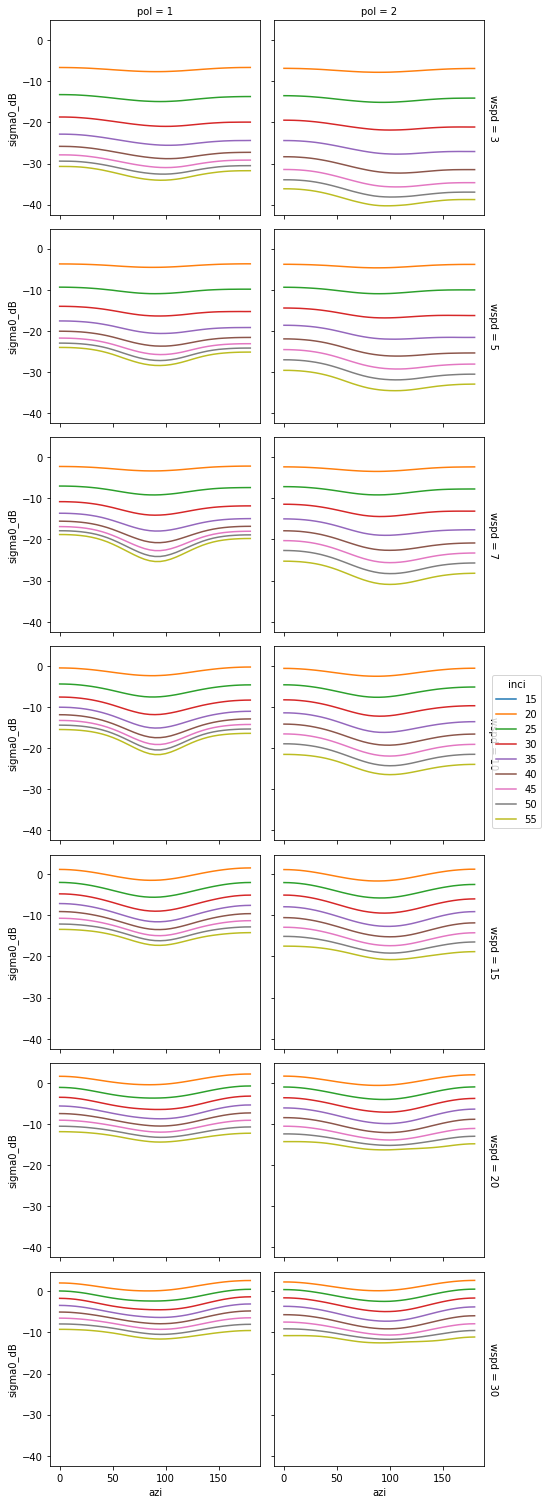

In [11]:
ds.sigma0_dB.plot(
    x='azi', hue='inci', col='pol', row='wspd',
)

# Test xr.DataArray as input

In [12]:
t, inci2D = np.mgrid[-10:10:1, 20:50:1]

In [13]:
wdir2D = 150+15*np.random.random_sample(inci2D.shape)
wspd2D = 7+2*np.random.random_sample(inci2D.shape)
pol2D = 1*np.ones(inci2D.shape)

In [14]:
ds = xr.Dataset(
    data_vars=dict(
        incidenceImage=(['x','y'], inci2D),
        wdir=(['x','y'], wdir2D),
        wspd=(['x','y'], wspd2D),
        pol=(['x','y'],pol2D)
    ),
)

In [23]:
ds['s0_lin'] = ss.gmfs.nrcs.nscat4(
    ds.wspd,
    ds.wdir,
    ds.incidenceImage,
    ds.pol,
)
ds['s0_dB'] = 10 * np.log10(ds['s0_lin'])

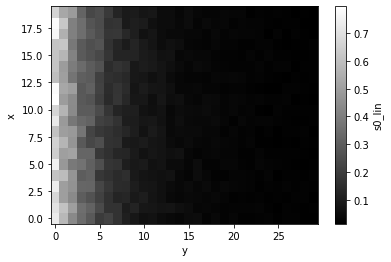

In [22]:
ds.s0_lin.plot(cmap='gist_gray',)

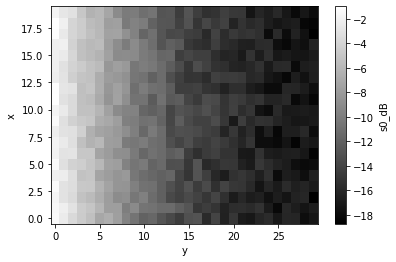

In [24]:
ds.s0_dB.plot(cmap='gist_gray',)